In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
sns.set()

In [2]:
raw_data = pd.read_csv('F:/Datasets/data.csv')
raw_data.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
raw_data.describe(include='all')

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,8172,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,915,NaN,10,NaN,NaN,5,4,NaN,71,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,Silverado 1500,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Crossover,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,156,NaN,7172,NaN,NaN,8266,4787,NaN,1110,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


In [4]:
data = raw_data.drop(['Model','Market Category'], axis=1)
data.describe(include='all')

,Make,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
count,11914,11914.000000,11911,11845.00000,11884.000000,11914,11914,11908.000000,11914,11914,11914.000000,11914.000000,11914.000000,1.191400e+04
unique,48,NaN,10,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1123,NaN,7172,NaN,NaN,8266,4787,NaN,4764,3048,NaN,NaN,NaN,NaN
mean,NaN,2010.384338,NaN,249.38607,5.628829,NaN,NaN,3.436093,NaN,NaN,26.637485,19.733255,1554.911197,4.059474e+04
std,NaN,7.579740,NaN,109.19187,1.780559,NaN,NaN,0.881315,NaN,NaN,8.863001,8.987798,1441.855347,6.010910e+04
min,NaN,1990.000000,NaN,55.00000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.00000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,2.100000e+04
50%,NaN,2015.000000,NaN,227.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1385.000000,2.999500e+04
75%,NaN,2016.000000,NaN,300.00000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,4.223125e+04


In [5]:
data.isnull().sum()

Make                  0
Year                  0
Engine Fuel Type      3
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Driven_Wheels         0
Number of Doors       6
Vehicle Size          0
Vehicle Style         0
highway MPG           0
city mpg              0
Popularity            0
MSRP                  0
dtype: int64

In [6]:
data_no_mv = data.dropna(axis=0)

In [7]:
data_no_mv.rename(columns = {'Engine HP': 'HP', 'Engine Cylinders': 'Cylinders', 'Transmission Type': 'Transmission', 'Driven_Wheels': 'Drive Mode','highway MPG': 'MPG-H', 'city mpg': 'MPG-C', 'MSRP': 'Price'}, inplace = True)
data_no_mv.describe(include='all')

C:\Users\hpc\Anaconda3\lib\site-packages\pandas\core\frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


,Make,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
count,11812,11812.000000,11812,11812.000000,11812.000000,11812,11812,11812.000000,11812,11812,11812.000000,11812.000000,11812.000000,1.181200e+04
unique,47,NaN,9,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1115,NaN,7155,NaN,NaN,8231,4732,NaN,4708,3013,NaN,NaN,NaN,NaN
mean,NaN,2010.361581,NaN,249.504487,5.649424,NaN,NaN,3.432526,NaN,NaN,26.320945,19.328141,1553.679902,4.055994e+04
std,NaN,7.594647,NaN,109.206947,1.751646,NaN,NaN,0.882919,NaN,NaN,7.443589,6.527734,1440.067820,6.028413e+04
min,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,7.000000,2.000000,2.000000e+03
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,2.099000e+04
50%,NaN,2015.000000,NaN,227.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1385.000000,2.997000e+04
75%,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,4.220500e+04


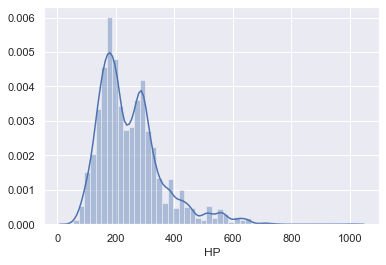

In [8]:
sns.distplot(data_no_mv['HP'])

In [9]:
q = data_no_mv['HP'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['HP']<q]
data_1.describe(include='all')

,Make,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
count,11691,11691.000000,11691,11691.000000,11691.000000,11691,11691,11691.000000,11691,11691,11691.000000,11691.000000,11691.000000,11691.000000
unique,46,NaN,9,NaN,NaN,5,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1095,NaN,7155,NaN,NaN,8189,4732,NaN,4651,2999,NaN,NaN,NaN,NaN
mean,NaN,2010.324352,NaN,245.255154,5.598067,NaN,NaN,3.444444,NaN,NaN,26.397229,19.402874,1555.907279,37894.273715
std,NaN,7.619412,NaN,101.219474,1.674197,NaN,NaN,0.876783,NaN,NaN,7.437790,6.516246,1443.440638,42705.030300
min,NaN,1990.000000,NaN,55.000000,0.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,8.000000,2.000000,2000.000000
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,20887.500000
50%,NaN,2015.000000,NaN,225.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1385.000000,29775.000000
75%,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,2009.000000,41725.000000


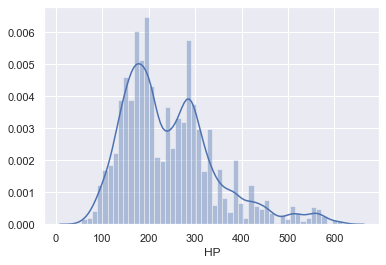

In [10]:
sns.distplot(data_1['HP'])

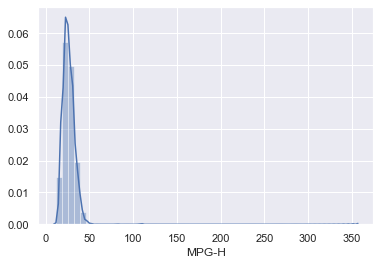

In [11]:
sns.distplot(data_1['MPG-H'])

In [12]:
q = data_1['MPG-H'].quantile(0.99)
data_2 = data_1[data_1['MPG-H']<q]

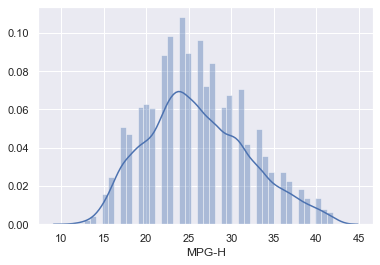

In [13]:
sns.distplot(data_2['MPG-H'])

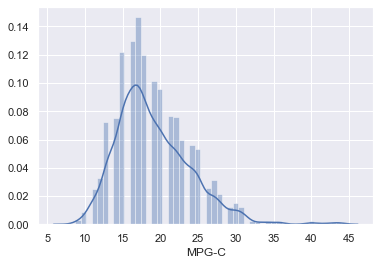

In [14]:
sns.distplot(data_2['MPG-C'])

In [15]:
q = data_2['MPG-C'].quantile(0.99)
data_3 = data_2[data_2['MPG-C']<q]

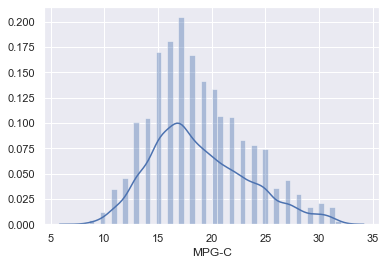

In [16]:
sns.distplot(data_3['MPG-C'])

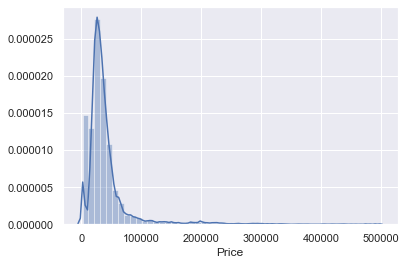

In [17]:
sns.distplot(data_3['Price'])

In [18]:
q = data_3['Price'].quantile(0.99)
data_4 = data_3[data_3['Price']<q]

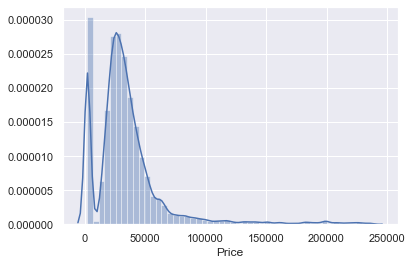

In [19]:
sns.distplot(data_4['Price'])

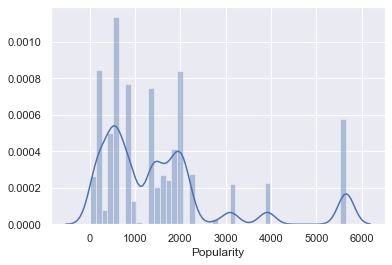

In [20]:
sns.distplot(data_4['Popularity'])

In [21]:
q = data_4['Popularity'].quantile(0.99)
data_5 = data_4[data_4['Popularity']<q]

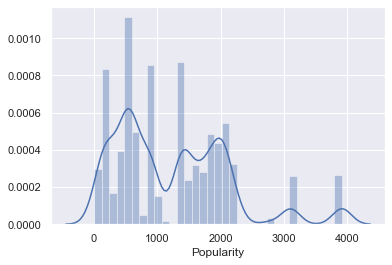

In [22]:
sns.distplot(data_5['Popularity'])

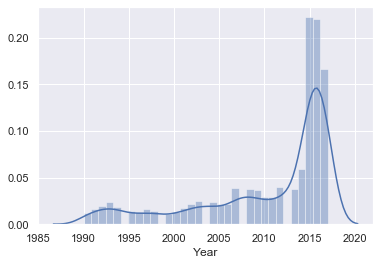

In [23]:
sns.distplot(data_5['Year'])

In [24]:
q = data_5['Year'].quantile(0.01)
data_6 = data_5[data_5['Year']>q]

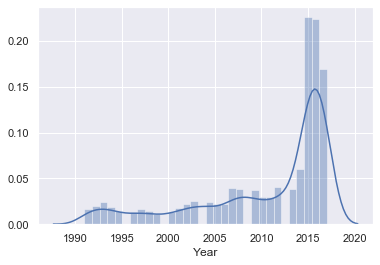

In [25]:
sns.distplot(data_6['Year'])

In [26]:
data_cleaned = data_6.reset_index(drop=True)
data_cleaned.describe(include='all')

,Make,Year,Engine Fuel Type,HP,Cylinders,Transmission,Drive Mode,Number of Doors,Vehicle Size,Vehicle Style,MPG-H,MPG-C,Popularity,Price
count,10361,10361.000000,10361,10361.000000,10361.000000,10361,10361,10361.000000,10361,10361,10361.000000,10361.000000,10361.000000,10361.000000
unique,44,NaN,8,NaN,NaN,4,4,NaN,3,16,NaN,NaN,NaN,NaN
top,Chevrolet,NaN,regular unleaded,NaN,NaN,AUTOMATIC,front wheel drive,NaN,Compact,Sedan,NaN,NaN,NaN,NaN
freq,1081,NaN,6297,NaN,NaN,7264,4199,NaN,4193,2719,NaN,NaN,NaN,NaN
mean,NaN,2010.482675,NaN,245.956857,5.563652,NaN,NaN,3.453817,NaN,NaN,26.277386,19.074896,1228.906090,36264.620307
std,NaN,7.403388,NaN,98.392239,1.595187,NaN,NaN,0.877989,NaN,NaN,5.809880,4.477851,892.078316,32623.980960
min,NaN,1991.000000,NaN,55.000000,3.000000,NaN,NaN,2.000000,NaN,NaN,12.000000,8.000000,2.000000,2000.000000
25%,NaN,2007.000000,NaN,170.000000,4.000000,NaN,NaN,2.000000,NaN,NaN,22.000000,16.000000,549.000000,21000.000000
50%,NaN,2015.000000,NaN,230.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,26.000000,18.000000,1013.000000,29995.000000
75%,NaN,2016.000000,NaN,300.000000,6.000000,NaN,NaN,4.000000,NaN,NaN,30.000000,22.000000,1851.000000,42300.000000


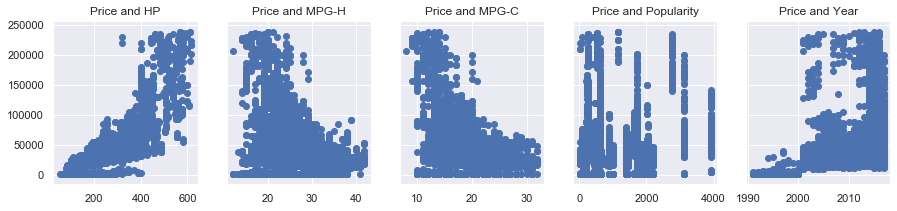

In [27]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['HP'],data_cleaned['Price'])
ax1.set_title('Price and HP')
ax2.scatter(data_cleaned['MPG-H'],data_cleaned['Price'])
ax2.set_title('Price and MPG-H')
ax3.scatter(data_cleaned['MPG-C'],data_cleaned['Price'])
ax3.set_title('Price and MPG-C')
ax4.scatter(data_cleaned['Popularity'],data_cleaned['Price'])
ax4.set_title('Price and Popularity')
ax5.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax5.set_title('Price and Year')

plt.show()

In [28]:
log_price = np.log(data_cleaned['Price'])

data_cleaned['log_price'] = log_price

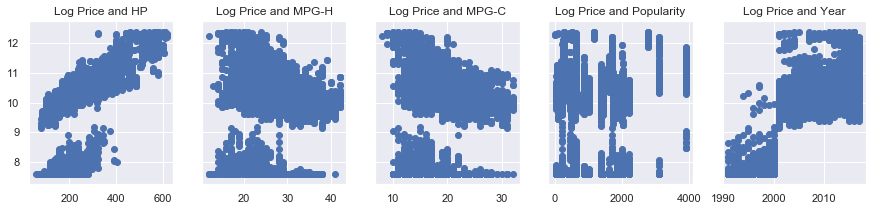

In [29]:
f, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5, sharey=True, figsize =(15,3)) #sharey -> share 'Price' as y
ax1.scatter(data_cleaned['HP'],data_cleaned['log_price'])
ax1.set_title('Log Price and HP')
ax2.scatter(data_cleaned['MPG-H'],data_cleaned['log_price'])
ax2.set_title('Log Price and MPG-H')
ax3.scatter(data_cleaned['MPG-C'],data_cleaned['log_price'])
ax3.set_title('Log Price and MPG-C')
ax4.scatter(data_cleaned['Popularity'],data_cleaned['log_price'])
ax4.set_title('Log Price and Popularity')
ax5.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax5.set_title('Log Price and Year')

plt.show()

In [30]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)

In [31]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['HP','Year','MPG-H','MPG-C','Popularity']]
vif = pd.DataFrame()

vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
vif["Features"] = variables.columns

In [32]:
vif

,VIF,Features
0,11.805003,HP
1,56.214207,Year
2,199.102590,MPG-H
3,204.682474,MPG-C
4,2.991230,Popularity


In [33]:
data_no_multicollinearity = data_cleaned.drop(['MPG-C','MPG-H'],axis=1)

In [34]:
data_preprocessed = pd.get_dummies(data_no_multicollinearity, drop_first=True)

In [35]:
data_preprocessed.head()

,Year,HP,Cylinders,Number of Doors,Popularity,log_price,Make_Alfa Romeo,Make_Aston Martin,Make_Audi,Make_BMW,...,Vehicle Style_Convertible,Vehicle Style_Convertible SUV,Vehicle Style_Coupe,Vehicle Style_Crew Cab Pickup,Vehicle Style_Extended Cab Pickup,Vehicle Style_Passenger Minivan,Vehicle Style_Passenger Van,Vehicle Style_Regular Cab Pickup,Vehicle Style_Sedan,Vehicle Style_Wagon
0,2011,335.0,6.0,2.0,3916,10.739327,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
1,2011,300.0,6.0,2.0,3916,10.612754,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
2,2011,300.0,6.0,2.0,3916,10.500949,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
3,2011,230.0,6.0,2.0,3916,10.290449,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,2011,230.0,6.0,2.0,3916,10.448715,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0


In [36]:
targets = data_preprocessed['log_price']

inputs = data_preprocessed.drop(['log_price'],axis=1)

In [37]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(inputs)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [38]:
inputs_scaled = scaler.transform(inputs)

In [39]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, targets, test_size=0.2, random_state=365)

In [40]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
y_hat = reg.predict(x_train)

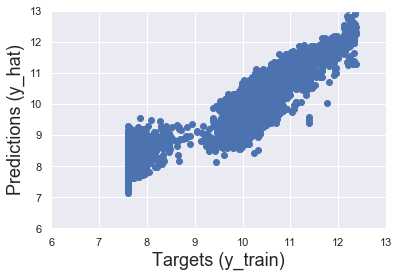

In [42]:
plt.scatter(y_train, y_hat)
plt.xlabel('Targets (y_train)',size=18)
plt.ylabel('Predictions (y_hat)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

Text(0.5, 1.0, 'Residuals PDF')

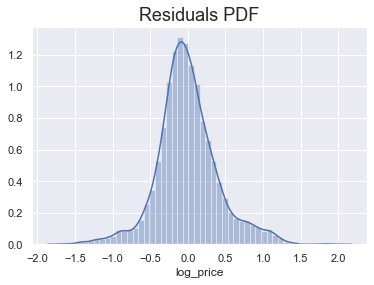

In [43]:
sns.distplot(y_train - y_hat)

plt.title("Residuals PDF", size=18)

In [44]:
reg.score(x_train,y_train)

0.8496435941552652

In [45]:
reg.intercept_

-33969950451.502365

In [46]:
reg.coef_

array([ 6.91378392e-01,  1.47941626e-01,  1.66219912e-01,  1.27810650e-01,
       -2.21791574e+11, -4.96916892e+08,  1.09610843e+09,  1.23649424e+11,
        1.61354186e+11,  4.81130245e+09, -1.63039000e+09,  6.74450342e+10,
        8.97631486e+10,  2.66369368e+10,  9.55735587e+10,  1.15059701e+10,
        4.20200333e+10,  1.82078663e+10, -7.74124862e+08, -7.44666440e+08,
        9.53605928e+10,  5.10702253e+10, -6.10353011e+08,  5.40968536e+10,
        1.06679172e+10,  1.56641226e+09,  8.18762837e+09, -4.23297711e+09,
        5.37249291e+09,  6.30719283e+08,  1.82761378e+10, -2.44404237e+12,
        1.79523920e+10,  7.73941184e+09,  9.94001926e+10, -5.09162823e+09,
        7.24817058e+09,  1.95445543e+08,  4.21336773e+10, -4.07584131e+08,
        4.40264040e+09, -1.78864006e+09, -8.54498482e+08,  1.68281346e+10,
        1.23910938e+10,  1.11950101e+11,  4.36800144e+10,  2.63805934e+10,
       -1.16157532e-03, -7.06291199e-03, -9.79804993e-02, -2.83837318e-03,
       -7.04345703e-02,  

In [47]:
reg_summary = pd.DataFrame(inputs.columns.values, columns=['Features'])
reg_summary['Weights'] = reg.coef_
reg_summary

,Features,Weights
0,Year,6.913784e-01
1,HP,1.479416e-01
2,Cylinders,1.662199e-01
3,Number of Doors,1.278106e-01
4,Popularity,-2.217916e+11
...,...,...
73,Vehicle Style_Passenger Minivan,-1.620102e-02
74,Vehicle Style_Passenger Van,-4.245329e-02
75,Vehicle Style_Regular Cab Pickup,-2.468872e-02
76,Vehicle Style_Sedan,-1.453781e-01


In [48]:
data_cleaned['Make'].unique()

array(['BMW', 'Audi', 'FIAT', 'Mercedes-Benz', 'Chrysler', 'Nissan',
       'Volvo', 'Mazda', 'Mitsubishi', 'Ferrari', 'Alfa Romeo', 'Toyota',
       'McLaren', 'Pontiac', 'Porsche', 'Saab', 'GMC', 'Hyundai',
       'Plymouth', 'Honda', 'Oldsmobile', 'Suzuki', 'Cadillac', 'Kia',
       'Bentley', 'Chevrolet', 'Dodge', 'Lincoln', 'Subaru', 'Volkswagen',
       'Spyker', 'Buick', 'Acura', 'Maserati', 'Aston Martin',
       'Land Rover', 'Lotus', 'Lexus', 'Infiniti', 'Scion', 'Genesis',
       'Lamborghini', 'HUMMER', 'Rolls-Royce'], dtype=object)

In [49]:
y_hat_test = reg.predict(x_test)

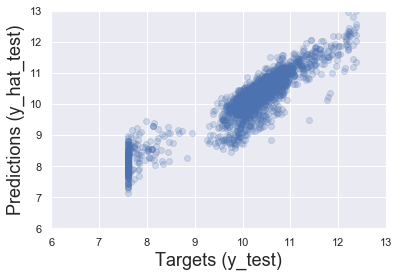

In [50]:
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.xlabel('Targets (y_test)',size=18)
plt.ylabel('Predictions (y_hat_test)',size=18)
plt.xlim(6,13)
plt.ylim(6,13)
plt.show()

In [51]:
df_pf = pd.DataFrame(np.exp(y_hat_test), columns=['Prediction'])
df_pf.head()

,Prediction
0,3023.515224
1,20405.060402
2,164861.854902
3,2370.940214
4,12330.489833


In [52]:
df_pf['Target'] = np.exp(y_test)
df_pf


,Prediction,Target
0,3023.515224,NaN
1,20405.060402,NaN
2,164861.854902,NaN
3,2370.940214,NaN
4,12330.489833,NaN
...,...,...
2068,25578.843782,NaN
2069,53625.810300,NaN
2070,57480.325214,NaN
2071,23994.659119,NaN


In [53]:
y_test = y_test.reset_index(drop=True)
y_test.head()

0     7.600902
1     9.549666
2    12.216023
3     7.656810
4     9.535246
Name: log_price, dtype: float64

In [54]:
df_pf['Target'] = np.exp(y_test)
df_pf

,Prediction,Target
0,3023.515224,2000.0
1,20405.060402,14040.0
2,164861.854902,202000.0
3,2370.940214,2115.0
4,12330.489833,13839.0
...,...,...
2068,25578.843782,20195.0
2069,53625.810300,44520.0
2070,57480.325214,45675.0
2071,23994.659119,21500.0


In [55]:
df_pf['Residual'] = df_pf['Target'] - df_pf['Prediction']

In [56]:
df_pf['Difference%'] = np.absolute(df_pf['Residual']/df_pf['Target']*100)
df_pf

,Prediction,Target,Residual,Difference%
0,3023.515224,2000.0,-1023.515224,51.175761
1,20405.060402,14040.0,-6365.060402,45.335188
2,164861.854902,202000.0,37138.145098,18.385220
3,2370.940214,2115.0,-255.940214,12.101192
4,12330.489833,13839.0,1508.510167,10.900428
...,...,...,...,...
2068,25578.843782,20195.0,-5383.843782,26.659291
2069,53625.810300,44520.0,-9105.810300,20.453303
2070,57480.325214,45675.0,-11805.325214,25.846361
2071,23994.659119,21500.0,-2494.659119,11.603066


In [57]:
df_pf.describe()

,Prediction,Target,Residual,Difference%
count,2073.000000,2073.000000,2073.000000,2073.000000
mean,36311.053053,36643.570188,332.517135,32.098736
std,34869.487644,33446.073230,17979.531608,35.662240
min,0.000000,2000.000000,-225525.545982,0.007654
25%,16858.411002,20990.000000,-5786.011976,11.299940
50%,28994.801265,29990.000000,-566.340791,23.143108
75%,44755.477400,42555.000000,5837.690589,40.142708
max,432778.603273,238500.000000,229000.000000,342.751877


In [58]:
pd.options.display.max_rows = 999
pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_pf.sort_values(by=['Difference%'])

,Prediction,Target,Residual,Difference%
1594,57704.42,57700.00,-4.42,0.01
1805,47711.80,47700.00,-11.80,0.02
507,47913.16,47900.00,-13.16,0.03
120,17091.52,17099.00,7.48,0.04
1721,118914.17,118845.00,-69.17,0.06
...,...,...,...,...
1147,7339.99,2000.00,-5339.99,267.00
269,7826.02,2000.00,-5826.02,291.30
783,10257.80,2411.00,-7846.80,325.46
2011,12776.18,2905.00,-9871.18,339.80
